In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import polyphase
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# get phase diagram and compare
M = [5,5,1]
chi =[1,0.5,0.5]
f = lambda x: polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f,20,3)
engine.compute(use_parallel=False, verbose=False, lift_label=True)
df = engine.df.T

Computation took 0.09s


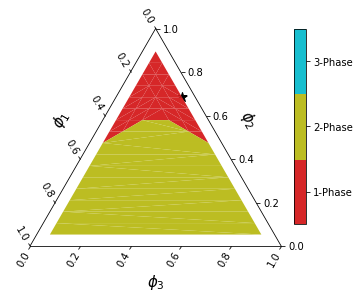

In [4]:
p1,p2,p3,l = df[df['label']==1].sample().values[0]
x0 = np.asarray([p1,p2,p3])
ax, _ = polyphase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
ax.scatter(p3,p1,p2,color='k',marker='*',s=100)
plt.show()

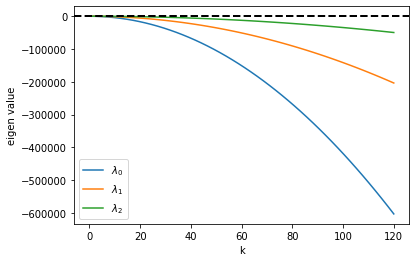

Is the point stable: True


In [6]:
lsa = polyphase.LSA(M,chi)
lsa.evaluate(x0)
lsa.plot()
print('Is the point stable: {}'.format(lsa.is_stable(x0)))

In [8]:
isstable = []
for _, row in df.iterrows():
    p1,p2,p3,_ = row.values
    x0 = np.asarray([p1,p2,p3])
    isstable.append(lsa.is_stable(x0))

isstable = np.asarray(isstable, dtype=bool)

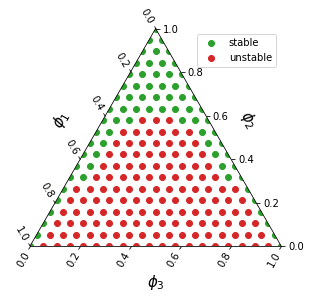

In [9]:
stable = df[isstable]
fig,ax = plt.subplots(subplot_kw={'projection':'ternary'})
ax.scatter(stable['Phi_3'],stable['Phi_1'],stable['Phi_2'],color='tab:green',label='stable')
unstable = df[~isstable]
ax.scatter(unstable['Phi_3'],unstable['Phi_1'],unstable['Phi_2'],color='tab:red', label='unstable')
polyphase._set_axislabels_mpltern(ax)
ax.legend()
plt.show()